<a href="https://colab.research.google.com/github/crerarc/Data_Science_Working/blob/main/covid_charting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Covid19 - various charting
Playing around with some data, sourced from "[Our World in Data](https://covid.ourworldindata.org/)" which is John Hopkins data.


# License

 covid_charting.py
 
 Copyright 2022 Crerar Christie <crerarc03@gmail.com>
 
This program is free software: you can redistribute it and/or modify it under
the terms of the GNU General Public License as published by the Free Software
Foundation, either version 3 of the License, or (at your option) any later version.

This program is distributed in the hope that it will be useful, but WITHOUT
ANY WARRANTY; without even the implied warranty of MERCHANTABILITY or FITNESS
FOR A PARTICULAR PURPOSE. See the GNU General Public License for more details.

You should have received a copy of the GNU General Public License along with
this program. If not, see <https://www.gnu.org/licenses/>
 

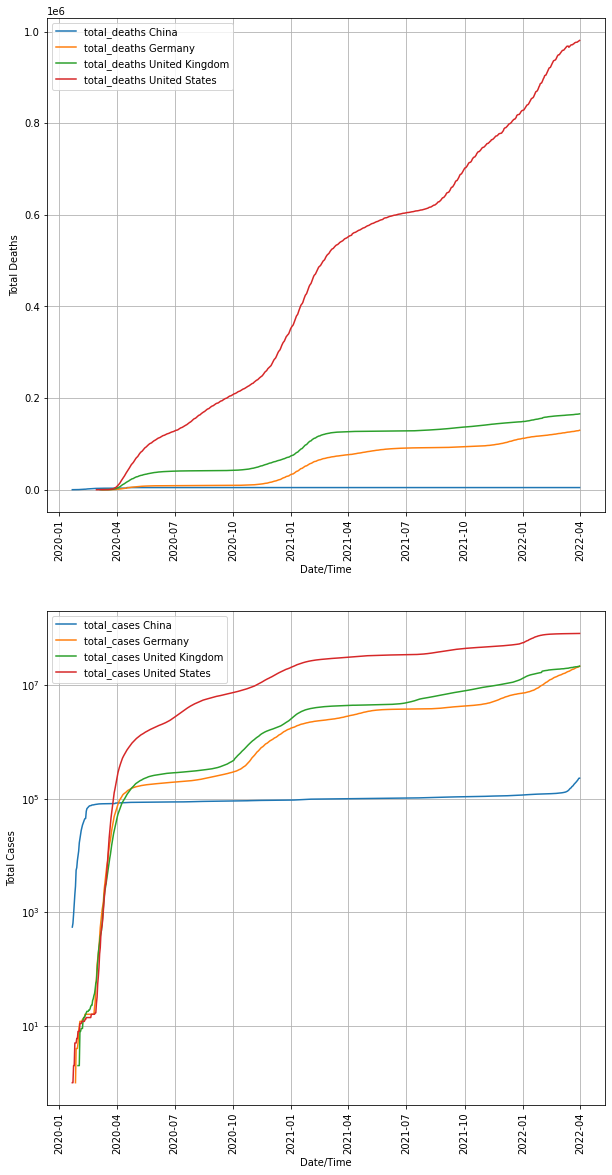

In [6]:
# Imports
import pandas as pd
import math
import matplotlib.pyplot as plt


# Variables
#f_data = "https://covid.ourworldindata.org/data/ecdc/full_data.csv" - old data source
f_data = "https://covid.ourworldindata.org/data/owid-covid-data.csv"
u_Cols = ['date','location','total_cases','total_deaths']
#loc_filtr = ['China', 'France', 'Germany', 'Italy', 'Spain', 'United Kingdom', 'United States']
loc_filtr = ['China', 'Germany', 'United Kingdom', 'United States']

# Data frames
df = pd.read_csv(f_data, index_col='date',usecols=u_Cols, parse_dates=['date'])
#print(df.head())
#print(df.columns.tolist())
dfp = df.pivot(columns='location',values='total_cases')
dfpr = dfp.filter(items=loc_filtr)
#dfpr.plot()
#dfp = df.pivot_table(columns='location',values='total_cases',fill_value=0.0)

#print(df.dtypes)
gdf = df.groupby('location')
#for name, group in gdf:
#    if name in loc_filtr:
#        print (name)
#        print (group)
    
# Plots
fig, axs = plt.subplots(2, figsize=(10, 20))
plt.xticks(rotation=90)
plt.yscale("log")
axs[0].grid()
axs[0].tick_params(axis="x", labelrotation=90)
axs[0].set(xlabel="Date/Time", ylabel="Total Deaths")

axs[1].grid()
axs[1].tick_params(axis="x", labelrotation=90)
axs[1].set(xlabel="Date/Time", ylabel="Total Cases")

for name, group in gdf:
    if name in loc_filtr:
        axs[0].plot(group.total_deaths,label=group.total_deaths.name+" "+name)
        axs[0].legend()
        axs[1].plot(group.total_cases,label=group.total_cases.name+" "+name)
        axs[1].legend()

plt.show()